In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re

In [2]:
df1=pd.read_csv("D:/Users/Dell/Documents/PythonProjects/Jupyter Notebook/resources/Excel_sheets/Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df1.shape

(13320, 9)

In [4]:
d=df1.groupby('area_type')['area_type'].count() #agg('count')

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df1.dropna(subset=['location','size'],inplace=True)

In [7]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df1.bath.fillna(0,inplace=True)
df1.balcony.fillna(0,inplace=True)
df1.society.fillna('unknown',inplace=True)

In [9]:
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2  unknown       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4  unknown       1200   2.0      1.0   51.00

In [10]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
df2=df1.copy()

In [12]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))

In [13]:
df2.loc[df2['total_sqft'].str.endswith('Sq. Meter')]

area_type   availability            location       size  \
410    Super built-up  Area  Ready To Move             Kengeri      1 BHK   
775          Built-up  Area  Ready To Move        Basavanagara      1 BHK   
1400   Super built-up  Area  Ready To Move          Chamrajpet      9 BHK   
1712             Plot  Area  Ready To Move    Singena Agrahara  3 Bedroom   
1743   Super built-up  Area         19-Mar           Hosa Road      3 BHK   
3228         Built-up  Area  Ready To Move     Dodda Banaswadi  5 Bedroom   
4113   Super built-up  Area         18-Jan          BTM Layout      3 BHK   
5631   Super built-up  Area  Ready To Move         Thanisandra      3 BHK   
5976         Built-up  Area  Ready To Move  1st Phase JP Nagar      1 BHK   
6303         Built-up  Area  Ready To Move            JP Nagar      3 BHK   
6592         Built-up  Area  Ready To Move       Langford Town      4 BHK   
6953   Super built-up  Area         18-Aug           Hosa Road      3 BHK   
7520   Super built-up  Area  Ready To Move       Doddaballapur      3 BHK   
9734           Carpet  Area  Ready To Move  Yelahanka New Town      1 BHK   
10491  Super built-up  Area  Ready To Move            Rajapura      2 BHK   
12252        Built-up  Area  Ready To Move        Gowdanapalya      5 BHK   
12560  Super built-up  Area         18-Dec           Hosa Road      3 BHK   

       society       total_sqft  bath  balcony   price  bhk  
410    unknown   34.46Sq. Meter   1.0      0.0   18.50    1  
775    unknown    1000Sq. Meter   2.0      1.0   93.00    1  
1400   unknown     716Sq. Meter   9.0      1.0  296.00    9  
1712   CoiewSy    1500Sq. Meter   3.0      1.0   95.00    3  
1743   Sosisic  142.61Sq. Meter   3.0      1.0  115.00    3  
3228   unknown    3040Sq. Meter   5.0      1.0  140.00    5  
4113   unknown     167Sq. Meter   3.0      2.0   10.00    3  
5631   Soitya      204Sq. Meter   4.0      2.0  185.00    3  
5976   Opamaan   78.03Sq. Meter   1.0      1.0   63.00    1  
6303   unknown   84.53Sq. Meter   3.0      1.0   69.34    3  
6592   unknown     697Sq. Meter   4.0      2.0  211.00    4  
6953   Sosisic  142.61Sq. Meter   3.0      1.0  109.00    3  
7520   unknown    1100Sq. Meter   2.0      1.0   48.00    3  
9734   KHatsFl   45.06Sq. Meter   2.0      1.0   18.00    1  
10491  unknown   86.72Sq. Meter   2.0      2.0   40.00    2  
12252  unknown      24Sq. Meter   5.0      0.0   75.00    5  
12560  Sosisic  142.84Sq. Meter   3.0      1.0  110.00    3

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

df2.loc[df2['total_sqft'].apply(is_float)]

area_type   availability            location       size  \
30     Super built-up  Area         19-Dec           Yelahanka      4 BHK   
56           Built-up  Area         20-Feb         Devanahalli  4 Bedroom   
81           Built-up  Area         18-Oct         Hennur Road  4 Bedroom   
122    Super built-up  Area         18-Mar              Hebbal      4 BHK   
137    Super built-up  Area         19-Mar  8th Phase JP Nagar      2 BHK   
...                     ...            ...                 ...        ...   
12990  Super built-up  Area         18-May      Talaghattapura      3 BHK   
13059  Super built-up  Area  Ready To Move              Harlur      2 BHK   
13240  Super built-up  Area  Ready To Move         Devanahalli      1 BHK   
13265  Super built-up  Area         20-Sep               Hoodi      2 BHK   
13299  Super built-up  Area         18-Dec          Whitefield      4 BHK   

       society   total_sqft  bath  balcony    price  bhk  
30     LedorSa  2100 - 2850   4.0      0.0  186.000    4  
56     BrereAt  3010 - 3410   0.0      0.0  192.000    4  
81     Gollela  2957 - 3450   0.0      0.0  224.500    4  
122    SNontle  3067 - 8156   4.0      0.0  477.000    4  
137    Vaarech  1042 - 1105   2.0      0.0   54.005    2  
...        ...          ...   ...      ...      ...  ...  
12990  Sodgere  1804 - 2273   3.0      0.0  122.000    3  
13059  Shodsir  1200 - 1470   2.0      0.0   72.760    2  
13240  Pardsri  1020 - 1130   0.0      0.0   52.570    1  
13265  Ranuetz  1133 - 1384   2.0      0.0   59.135    2  
13299  Prtates  2830 - 2882   5.0      0.0  154.500    4  

[239 rows x 10 columns]

In [15]:
def con_float(x):
    z=x.split("-")
    if len(z)==2:
        return (float(z[0])+float(z[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df2['total_sqft']=df2['total_sqft'].apply(con_float)

In [17]:
df2[df2['total_sqft'].apply(is_float)]

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk]
Index: []

In [18]:
df2.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  bhk  
0  Coomee       1056.0   2.0      1.0   39.07    2  
1  Theanmp      2600.0   5.0      3.0  120.00    4  
2  unknown      1440.0   2.0      3.0   62.00    3  
3  Soiewre      1521.0   3.0      1.0   95.00    3  
4  unknown      1200.0   2.0      1.0   51.00    2

In [19]:
df3=df2.copy()

In [20]:
df3['price/sqft']=round((df3.price*100000)/df3.total_sqft,2)
df3.head(2)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   

   society  total_sqft  bath  balcony   price  bhk  price/sqft  
0  Coomee       1056.0   2.0      1.0   39.07    2     3699.81  
1  Theanmp      2600.0   5.0      3.0  120.00    4     4615.38

In [21]:
df3["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [22]:
df3.drop(["area_type","availability","size","balcony"],axis="columns",inplace=True)

In [23]:
df3.head()

location  society  total_sqft  bath   price  bhk  \
0  Electronic City Phase II  Coomee       1056.0   2.0   39.07    2   
1          Chikka Tirupathi  Theanmp      2600.0   5.0  120.00    4   
2               Uttarahalli  unknown      1440.0   2.0   62.00    3   
3        Lingadheeranahalli  Soiewre      1521.0   3.0   95.00    3   
4                  Kothanur  unknown      1200.0   2.0   51.00    2   

   price/sqft  
0     3699.81  
1     4615.38  
2     4305.56  
3     6245.89  
4     4250.00

In [24]:
df3.location=df3.location.apply(lambda x: x.strip())

In [25]:
len(df3.location.unique())

1293

In [26]:
location_stats=df3.groupby("location")["location"].count()
type(location_stats)

pandas.core.series.Series

In [27]:
location_stats.sort_values(ascending=False)

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
location_less_than_10_values=location_stats[location_stats<=10]

In [29]:
len(location_less_than_10_values)

1052

In [30]:
df3.head()

location  society  total_sqft  bath   price  bhk  \
0  Electronic City Phase II  Coomee       1056.0   2.0   39.07    2   
1          Chikka Tirupathi  Theanmp      2600.0   5.0  120.00    4   
2               Uttarahalli  unknown      1440.0   2.0   62.00    3   
3        Lingadheeranahalli  Soiewre      1521.0   3.0   95.00    3   
4                  Kothanur  unknown      1200.0   2.0   51.00    2   

   price/sqft  
0     3699.81  
1     4615.38  
2     4305.56  
3     6245.89  
4     4250.00

In [31]:
df4=df3.copy()

In [32]:
df4.location=df4.location.apply(lambda x: "other" if x in location_less_than_10_values else x)

In [33]:
len(df4.location.unique())

242

In [34]:
df4[df4.total_sqft/df4.bhk <300].head()

location  society  total_sqft  bath  price  bhk  price/sqft
9                 other  unknown      1020.0   6.0  370.0    6    36274.51
45           HSR Layout  unknown       600.0   9.0  200.0    8    33333.33
58        Murugeshpalya  unknown      1407.0   4.0  150.0    6    10660.98
68  Devarachikkanahalli  unknown      1350.0   7.0   85.0    8     6296.30
70                other  unknown       500.0   3.0  100.0    3    20000.00

In [35]:
df5=df4[~(df4.total_sqft/df4.bhk <300)]
df5.shape

(12559, 7)

In [36]:
df5["price/sqft"].describe()

count     12513.000000
mean       6307.441655
std        4160.931637
min         267.830000
25%        4210.530000
50%        5295.010000
75%        6916.670000
max      176470.590000
Name: price/sqft, dtype: float64

In [37]:
df5[df5["price/sqft"]==df5["price/sqft"].min()]

location  society  total_sqft  bath  price  bhk  price/sqft
1894    other  unknown     52272.0   2.0  140.0    3      267.83

In [38]:
def remove_price_outliers(df):
    df_out=pd.DataFrame()
    for key ,subdf in df5.groupby("location"):
        mean=np.mean(subdf["price/sqft"])
        std=np.std(subdf["price/sqft"])
        reduced_df=subdf[(subdf["price/sqft"]>(mean-std)) & (subdf["price/sqft"]<(mean+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [39]:
df6=remove_price_outliers(df5)
df6.shape

(10286, 7)

In [40]:
df6.reset_index(inplace=True)

In [41]:
df6[df6.location=='Uttarahalli'].bhk.unique()

array([3, 2, 6, 1, 4], dtype=int64)

In [42]:
colors=['red','green','blue','yellow','#00ffff','#ff00bf','#937f3c','#937f91']

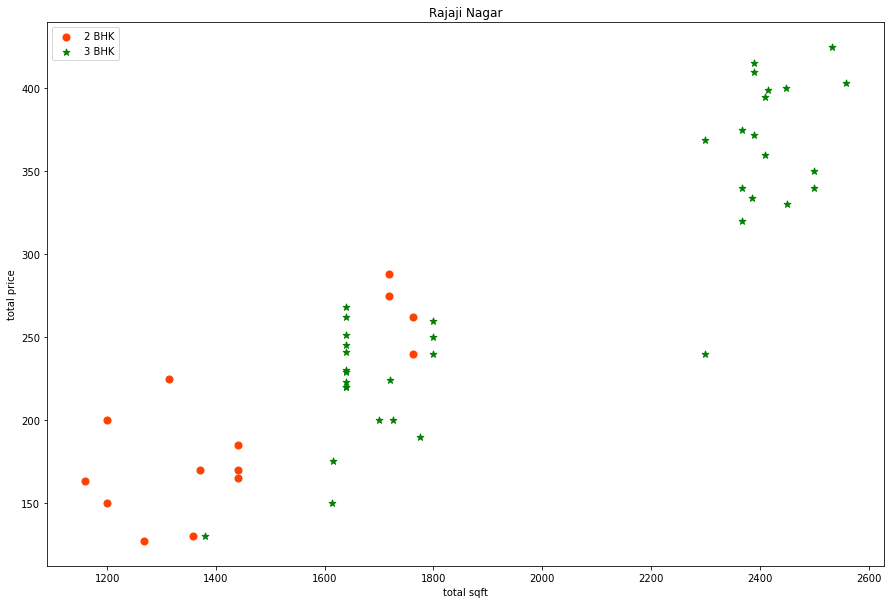

In [43]:

def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='#ff4000',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3 BHK',s=50)
    plt.xlabel('total sqft')
    plt.ylabel('total price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,'Rajaji Nagar')

In [44]:
df6.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

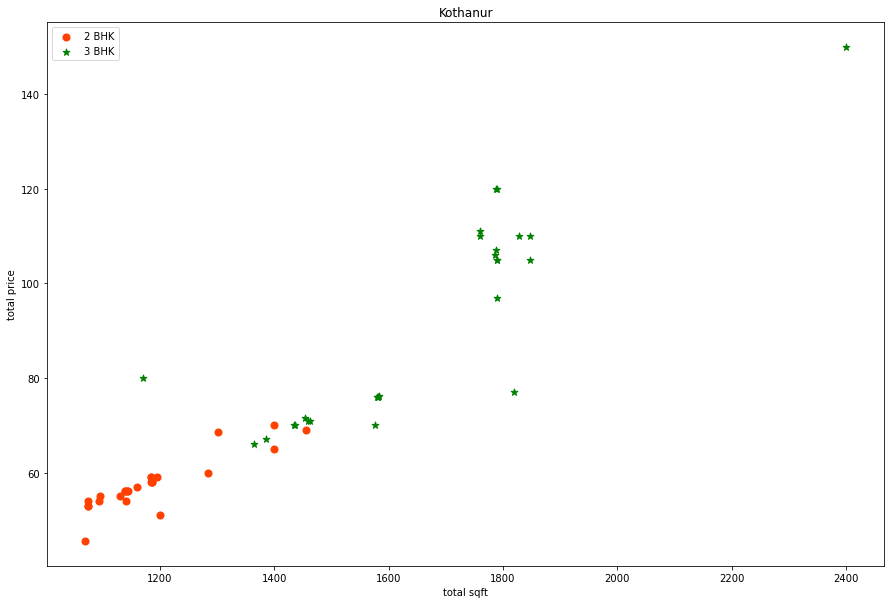

In [45]:
plot_scatter_chart(df6,'Kothanur')

In [46]:
df6[(df6.location=='Kothanur') & (df6.bhk==2)].index.values

array([4627, 4630, 4636, 4639, 4644, 4646, 4648, 4650, 4652, 4654, 4659,
       4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4672, 4674, 4677,
       4678, 4680, 4681], dtype=int64)

In [47]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df['price/sqft']),
                'std': np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price/sqft']<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape            

(7353, 8)

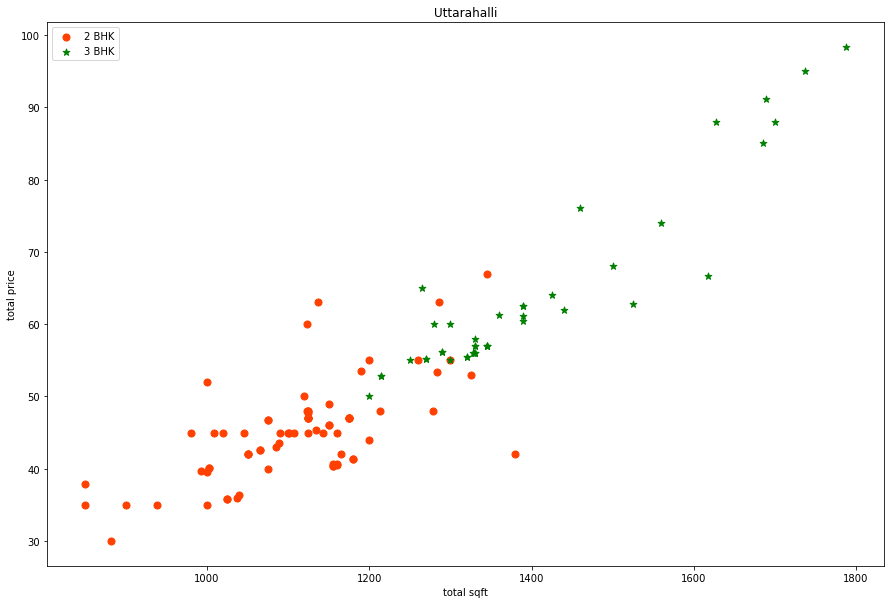

In [48]:
plot_scatter_chart(df7,'Uttarahalli')

Text(0.5, 1.0, 'area distribution')

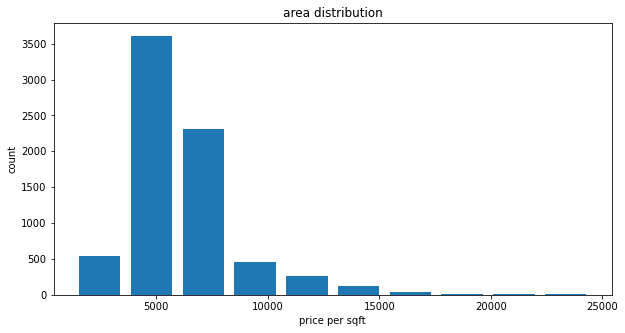

In [49]:
matplotlib.rcParams["figure.figsize"]=(10,5)
plt.hist(df7['price/sqft'],rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.title('area distribution')

In [50]:
df7[df7.bath>df7.bhk+2]

index       location  society  total_sqft  bath   price  bhk  price/sqft
1634   1634  Chikkabanavar  unknown      2460.0   7.0    80.0    4     3252.03
5267   5267     Nagasandra  unknown      7000.0   8.0   450.0    4     6428.57
6748   6748    Thanisandra  Soitya       1806.0   6.0   116.0    3     6423.03
8455   8455          other  Prowshi     11338.0   9.0  1000.0    6     8819.90

In [51]:
df8=df7[df7.bath<(df7.bhk+2)]
df8.shape

(7275, 8)

In [52]:
df9=df8.drop(['society','price/sqft','index'],axis='columns')

In [53]:
df9.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [54]:
dummies=pd.get_dummies(df9.location)
dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

In [55]:
df10=pd.concat([df9.drop('location',axis='columns'),dummies.drop('other',axis='columns')],axis='columns')
df10.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [56]:
df10.shape

(7275, 245)

In [57]:
X=df10.drop('price',axis='columns')

In [58]:
y=df10.price

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8307191372177145

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.8073658 , 0.77342635, 0.86465379, 0.83545637, 0.8180997 ])

In [62]:
"""def con_float(x):
    try:
        z=x.split("-")
        if len(z)==2:
            return (float(z[0])+float(z[1]))/2
        else:
            if x.endswith("Sq. Meter"):
                return float(x.split("Sq. Meter")[0])*10.764
            elif x.endswith("Sq. Yards"):
                return float(x.split("Sq. Yards")[0])*9
            elif x.endswith("Acres"):
                return float(x.split("Acres")[0])*43560
            elif x.endswith("Cents"):
                return float(x.split("Cents")[0])*435.56
            elif x.endswith("Perch"):
                return float(x.split("Perch")[0])*272.25
            elif x.endswith("Guntha"):
                return float(x.split("Guntha")[0])*1089
            elif x.endswith("Grounds"):
                return float(x.split("Grounds")[0])*2400           
    except AttributeError:
        return float(x)
    return float(x) 
                """

'def con_float(x):\n    try:\n        z=x.split("-")\n        if len(z)==2:\n            return (float(z[0])+float(z[1]))/2\n        else:\n            if x.endswith("Sq. Meter"):\n                return float(x.split("Sq. Meter")[0])*10.764\n            elif x.endswith("Sq. Yards"):\n                return float(x.split("Sq. Yards")[0])*9\n            elif x.endswith("Acres"):\n                return float(x.split("Acres")[0])*43560\n            elif x.endswith("Cents"):\n                return float(x.split("Cents")[0])*435.56\n            elif x.endswith("Perch"):\n                return float(x.split("Perch")[0])*272.25\n            elif x.endswith("Guntha"):\n                return float(x.split("Guntha")[0])*1089\n            elif x.endswith("Grounds"):\n                return float(x.split("Grounds")[0])*2400           \n    except AttributeError:\n        return float(x)\n    return float(x) \n                '

In [63]:
df9.head(30)

location  total_sqft  bath   price  bhk
0         1st Block Jayanagar      2850.0   4.0  428.00    4
1         1st Block Jayanagar      1630.0   3.0  194.00    3
2         1st Block Jayanagar      1875.0   2.0  235.00    3
3         1st Block Jayanagar      1200.0   2.0  130.00    3
4         1st Block Jayanagar      1235.0   2.0  148.00    2
5         1st Block Jayanagar      2750.0   4.0  413.00    4
6         1st Block Jayanagar      2450.0   4.0  368.00    4
8          1st Phase JP Nagar      1875.0   3.0  167.00    3
9          1st Phase JP Nagar      1500.0   5.0   85.00    5
10         1st Phase JP Nagar      2065.0   4.0  210.00    3
12         1st Phase JP Nagar      2059.0   3.0  225.00    3
13         1st Phase JP Nagar      1394.0   2.0  100.00    2
14         1st Phase JP Nagar      1077.0   2.0   93.00    2
15         1st Phase JP Nagar      1566.0   2.0  180.00    2
16         1st Phase JP Nagar       840.0   2.0   50.00    1
17         1st Phase JP Nagar      1590.0   3.0  131.00    3
18         1st Phase JP Nagar      2180.0   3.0  210.00    3
19         1st Phase JP Nagar      1180.0   2.0   88.50    2
20         1st Phase JP Nagar      1200.0   2.0   86.00    2
21         1st Phase JP Nagar      1394.0   2.0   85.00    2
22         1st Phase JP Nagar      2077.0   3.0  175.00    3
24         1st Phase JP Nagar      1205.0   2.0   85.00    2
26         1st Phase JP Nagar       900.0   2.0   75.00    2
27  2nd Phase Judicial Layout      1450.0   2.0   50.75    3
28  2nd Phase Judicial Layout      1150.0   2.0   40.25    2
29  2nd Phase Judicial Layout      1350.0   2.0   47.25    3
30  2nd Phase Judicial Layout      1350.0   2.0   47.25    3
31  2nd Phase Judicial Layout       900.0   2.0   41.00    2
32  2nd Phase Judicial Layout      1681.0   3.0   69.00    3
33  2nd Phase Judicial Layout      1350.0   2.0   47.25    3